In [27]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal


In [3]:
class QuadraticState(TypedDict):
    a: int
    b: int
    c: int

    equation: str
    discriminant: float
    result: str

In [12]:
def show_equation(state: QuadraticState):
    equation = f"{state['a']}x2{state['b']}x{state['c']}"
    return {'equation': equation}

In [13]:
def calculate_discriminant(state: QuadraticState):
    discriminant = state['b']**2 - (4*state['a']*state['c'])
    return {'discriminant': discriminant}

In [19]:
def real_roots(state: QuadraticState):
    root1 = (-state['b'] + state['discriminant']**0.5)/(2*state['a'])
    root2 = (-state['b'] - state['discriminant']**0.5)/(2*state['a'])

    return  {'result' : f'The roots are {root1} and {root2}'}

In [20]:
def repeated_roots(state: QuadraticState):
    root1 = (-state['b'])/(2*state['a'])

    return {'result' : f'Only repeatd root is {root1}' }

In [21]:
def no_real_roots(state: QuadraticState):
    return {'result' : 'No real roots'}

In [22]:
def check_condition(state: QuadraticState) -> Literal["real_roots", "repeated_roots", "no_real_roots"]:
    if state['discriminant'] > 0:
        return "real_roots"
    elif state['discriminant'] == 0:
        return "repeated_roots"
    else:
        return "no_real_roots"


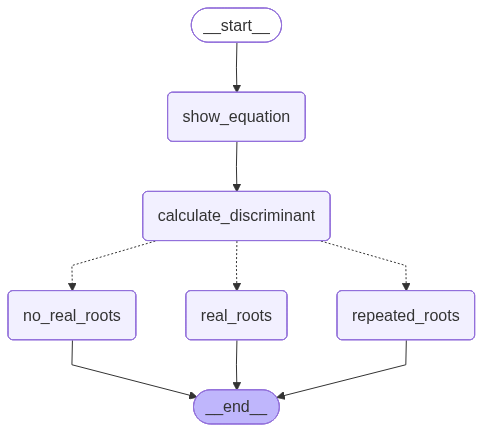

In [23]:
graph = StateGraph(QuadraticState)

graph.add_node('show_equation', show_equation)
graph.add_node('calculate_discriminant', calculate_discriminant)

graph.add_node('real_roots', real_roots)
graph.add_node('repeated_roots', repeated_roots)
graph.add_node('no_real_roots', no_real_roots)

graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calculate_discriminant')


graph.add_conditional_edges('calculate_discriminant', check_condition)

graph.add_edge('real_roots',END)
graph.add_edge('repeated_roots',END)
graph.add_edge('no_real_roots',END)


workflow = graph.compile()
workflow

In [26]:
# intial_state = { 'a': 4, 'b': -5, 'c': -4 }
# intial_state = { 'a': 4, 'b': 2, 'c': 4 }
intial_state = { 'a': 2, 'b': 4, 'c': 2 }
output = workflow.invoke(intial_state)
output

{'a': 2,
 'b': 4,
 'c': 2,
 'equation': '2x24x2',
 'discriminant': 0,
 'result': 'Only repeatd root is -1.0'}